# Exploratory Data Analysis

Before diving into the development of our recommender system, we begin with a thorough EDA. The goal of this step is to gain a solid understanding of the dataset’s structure, contents, and key patterns. By exploring the variables, distributions, missing values, and potential outliers, we ensure that we are well-informed about the data we’re working with.

### Outline of the Notebook

- Step 1: Description
- Step 2: Univariate Analysis
    - 2.1 Numerical Columns
    - 2.2 Categorical Columns
- Step 3: Bivariate Analysis
- Step 4: Text Analysis
- Conclusion

In [15]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [ ]:
# Load and display the dataset

# Path to the dataset, to be changed according to your local setup
PATH = "/Users/agathecauhape/EMLyon 2024-25/Canada/Recommender System/projet/data/"

file_path = os.path.join(PATH, "video_game_clean.csv")
df = pd.read_csv(file_path)
print(df.head(3))

           game_title  user_rating age_group_targeted  price platform  \
0  Grand Theft Auto V         36.4           All Ages  41.41       PC   
1          The Sims 4         38.3             Adults  57.56       PC   
2           Minecraft         26.8              Teens  44.93       PC   

  requires_special_device   developer        publisher  release_year  \
0                      No  Game Freak       Innersloth          2015   
1                      No    Nintendo  Electronic Arts          2015   
2                     Yes      Bungie           Capcom          2012   

       genre multiplayer  game_length_hours graphics_quality  \
0  Adventure          No               55.3           Medium   
1    Shooter         Yes               34.6              Low   
2  Adventure         Yes               13.9              Low   

  soundtrack_quality story_quality  \
0            Average          Poor   
1               Poor          Poor   
2               Good       Average   

        

## Step 1: Description

In [4]:
print("Shape of dataset:", df.shape)
print("\nInfo:")
df.info()

print("\nSummary statistics (numeric columns):")
print(df.describe())


Shape of dataset: (47774, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_title               47774 non-null  object 
 1   user_rating              47774 non-null  float64
 2   age_group_targeted       47774 non-null  object 
 3   price                    47774 non-null  float64
 4   platform                 47774 non-null  object 
 5   requires_special_device  47774 non-null  object 
 6   developer                47774 non-null  object 
 7   publisher                47774 non-null  object 
 8   release_year             47774 non-null  int64  
 9   genre                    47774 non-null  object 
 10  multiplayer              47774 non-null  object 
 11  game_length_hours        47774 non-null  float64
 12  graphics_quality         47774 non-null  object 
 13  soundtrack_quality       47774 non-null

In [5]:
# Numeric and Categorical Columns Detection
df_numeric = df.select_dtypes(include=['int', 'float'])
df_categorical = df.select_dtypes(include=['object', 'category', 'bool'])

print("\nNumeric columns:", df_numeric.columns.tolist())
print("Categorical columns:", df_categorical.columns.tolist())


Numeric columns: ['user_rating', 'price', 'release_year', 'game_length_hours', 'min_number_of_players']
Categorical columns: ['game_title', 'age_group_targeted', 'platform', 'requires_special_device', 'developer', 'publisher', 'genre', 'multiplayer', 'graphics_quality', 'soundtrack_quality', 'story_quality', 'user_review_text', 'game_mode']


## Step 2: Univariate Analysis

### 2.1 Numerical Columns

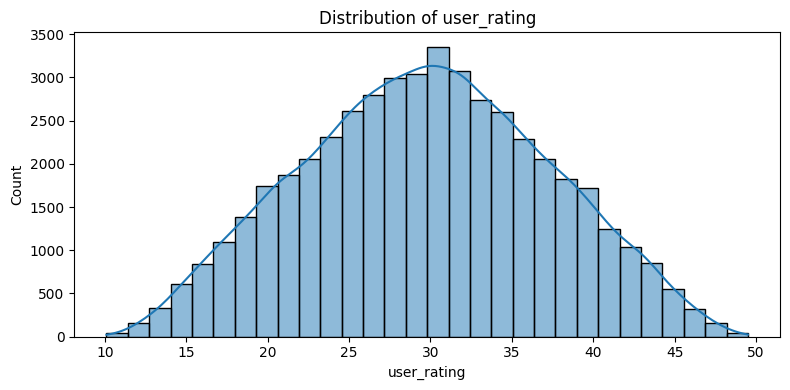

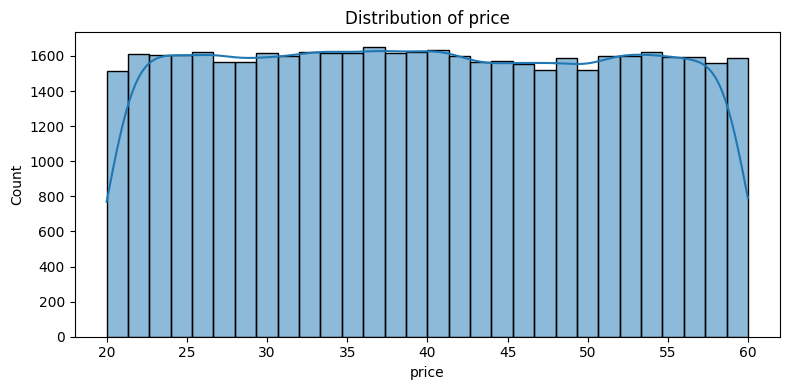

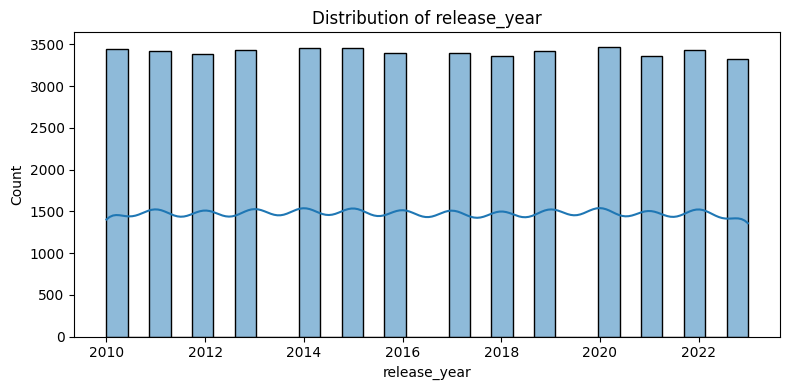

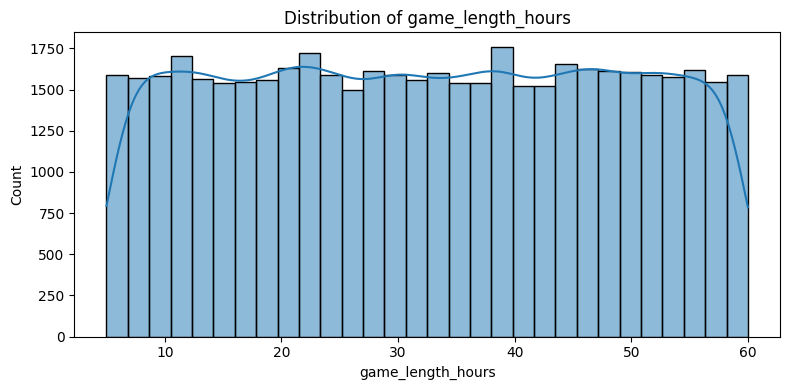

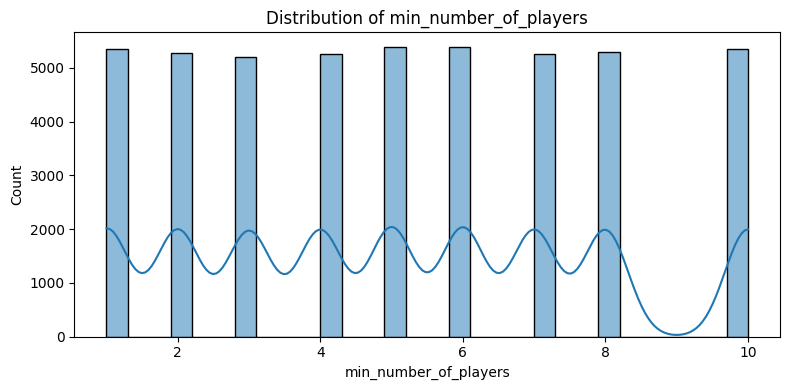

In [ ]:
# Distribution of Numeric Columns
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Game duration is almost uniformly distributed between 5 and 60 hours. The minimum number of players varies uniformly from 1 to 10, with no dominant value. User ratings follow a normal distribution centered around 30, with a marked peak between 28 and 32. Prizes are also evenly distributed between 20 and 60, with no clear trend.

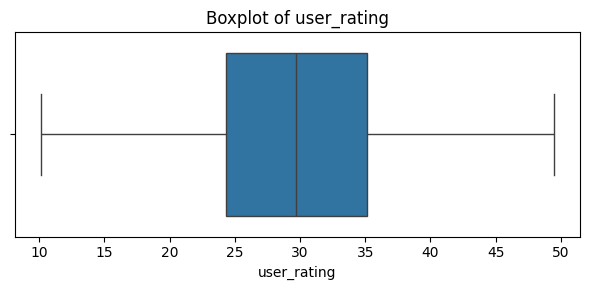

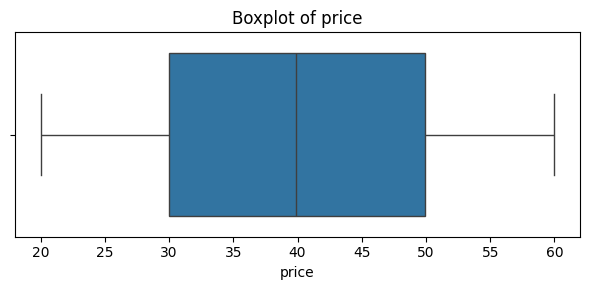

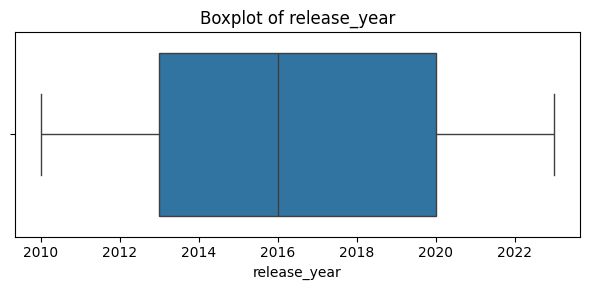

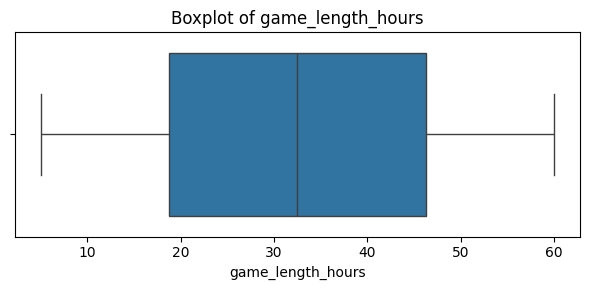

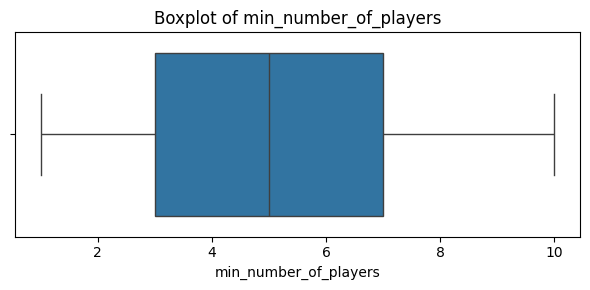

In [7]:
# Boxplots for Outlier Detection
for col in df_numeric.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

User ratings are centered around 30, with few extreme values. Prices are well distributed between 30 and 50, with no visible outliers. The year of release is concentrated between 2013 and 2020, showing a fairly recent base. Game duration is globally centered around 35 hours. The minimum number of players is balanced, with a median of 5.

### 2.2 Categorical Columns

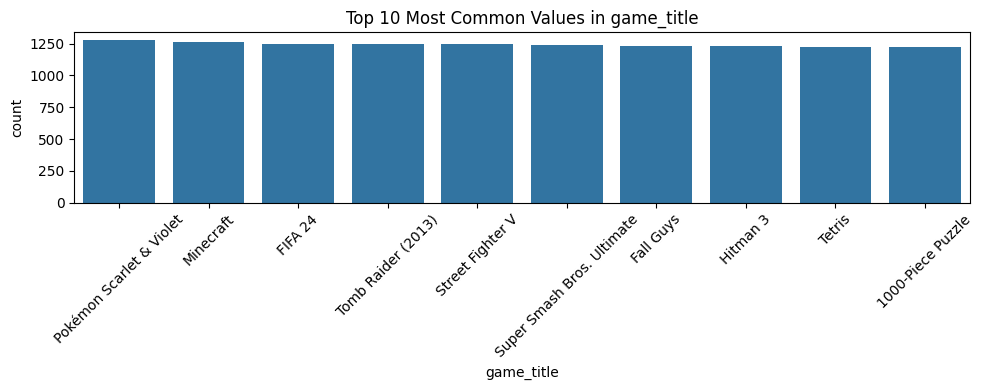

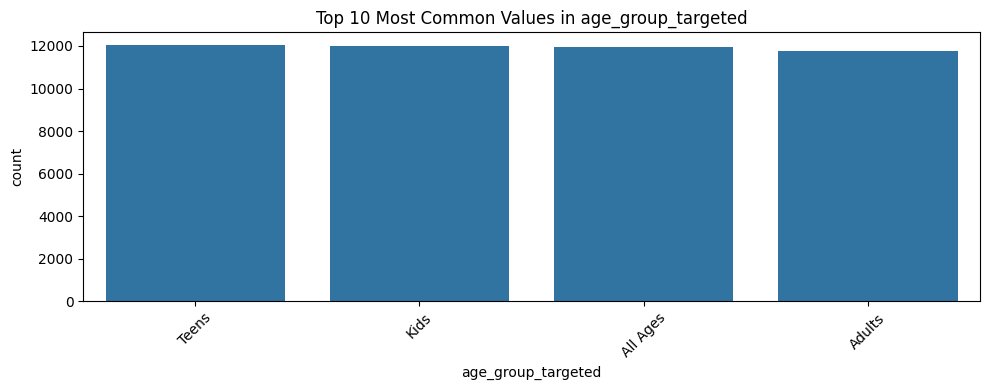

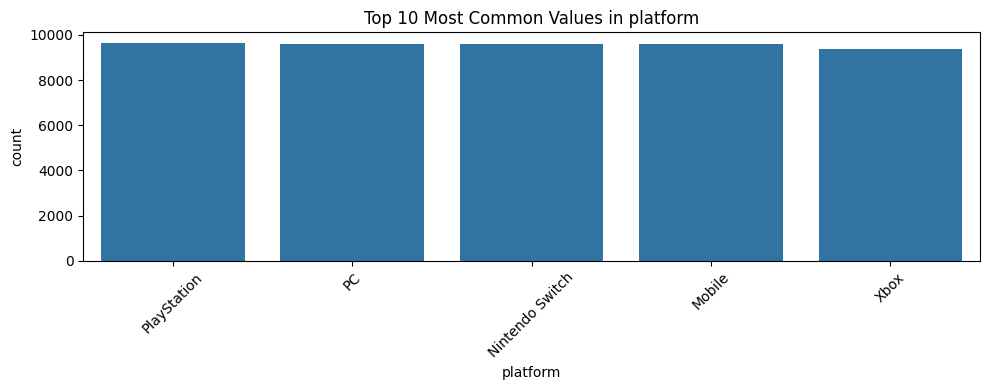

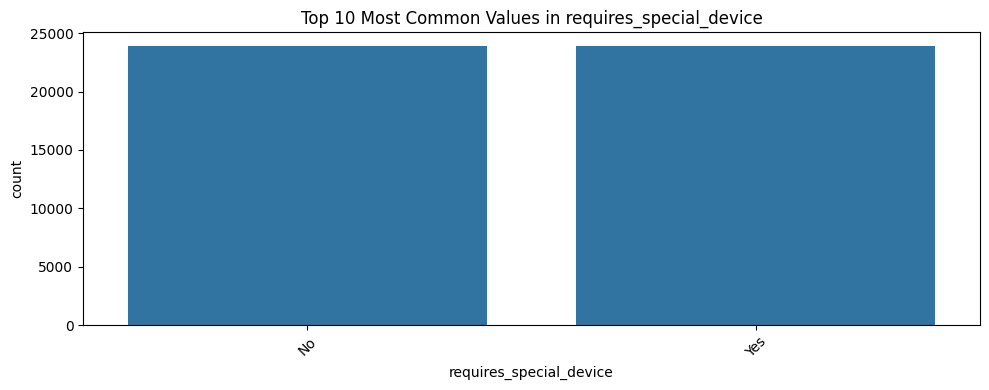

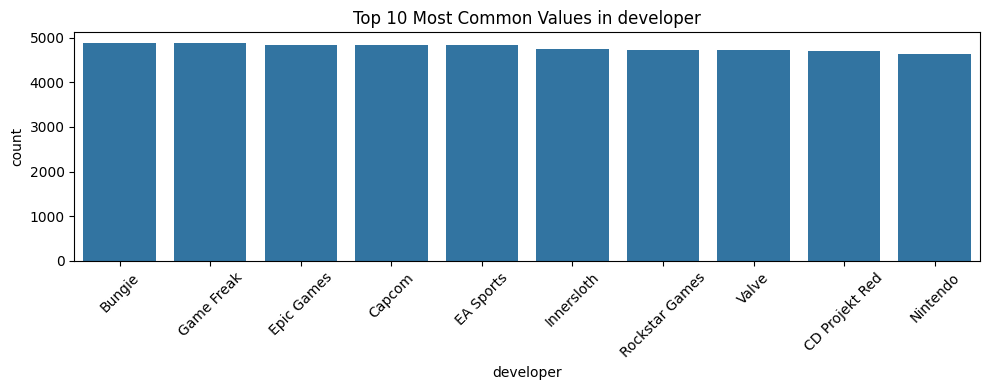

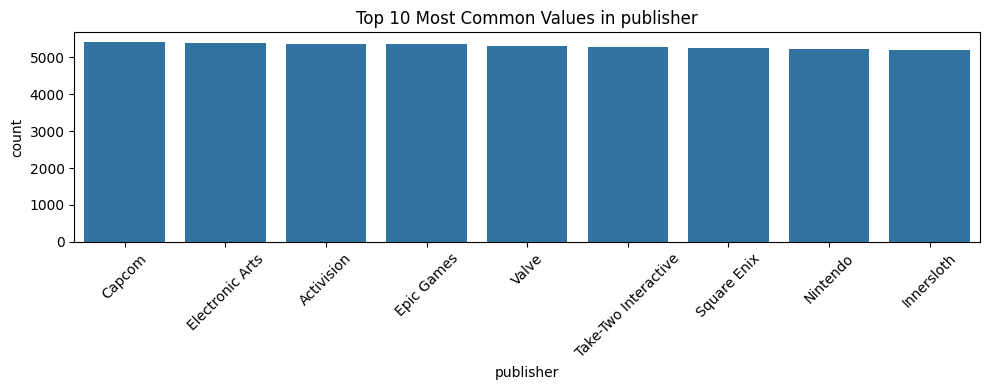

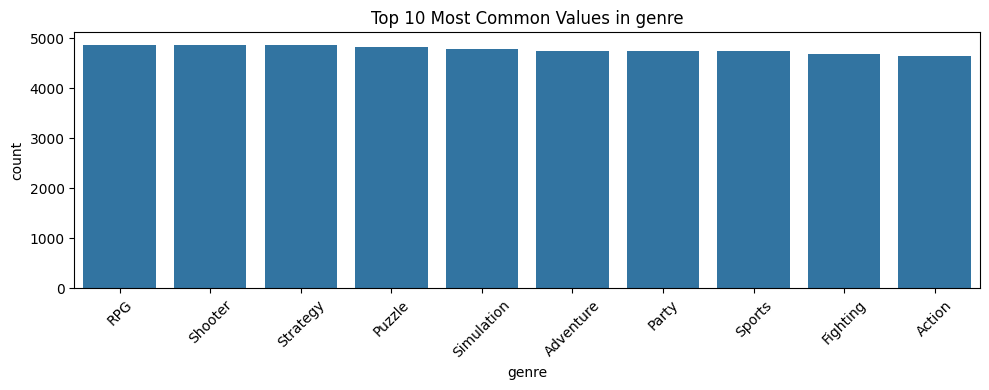

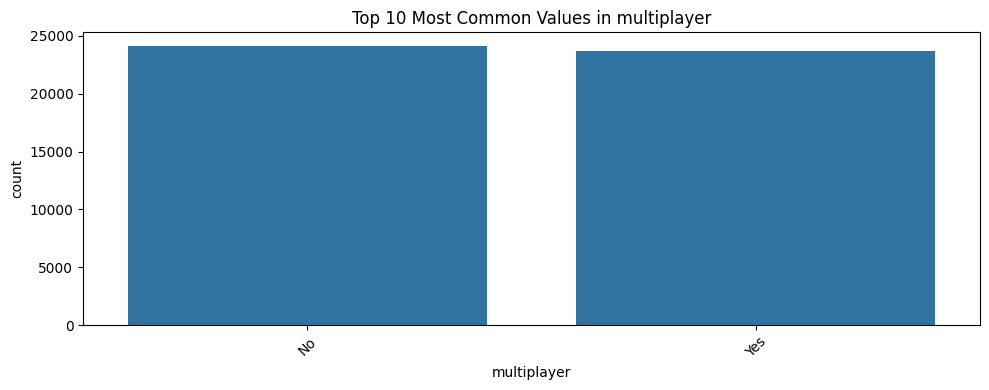

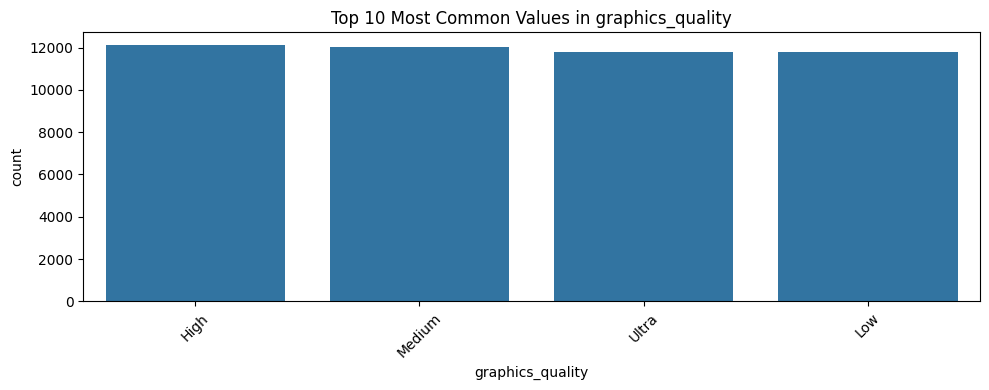

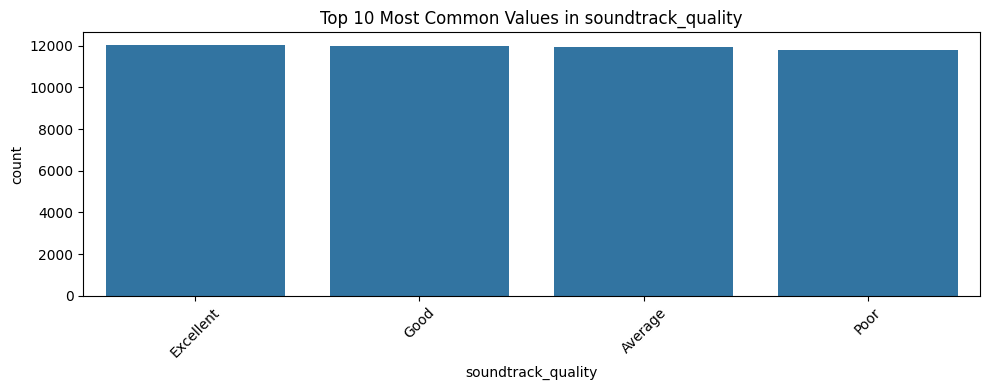

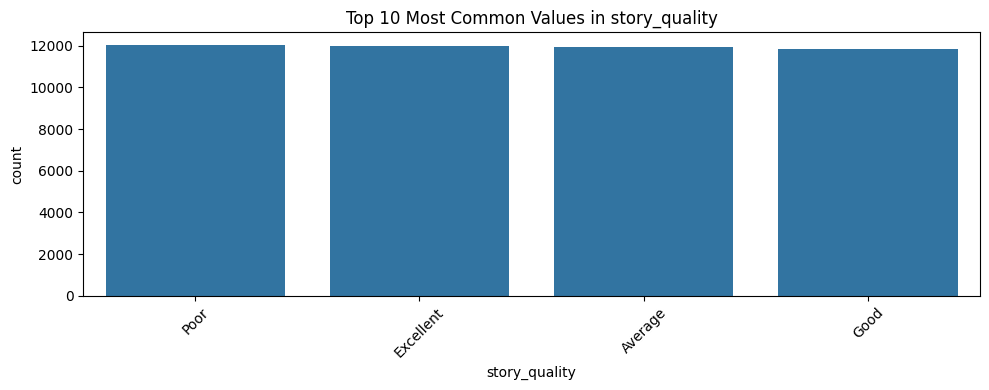

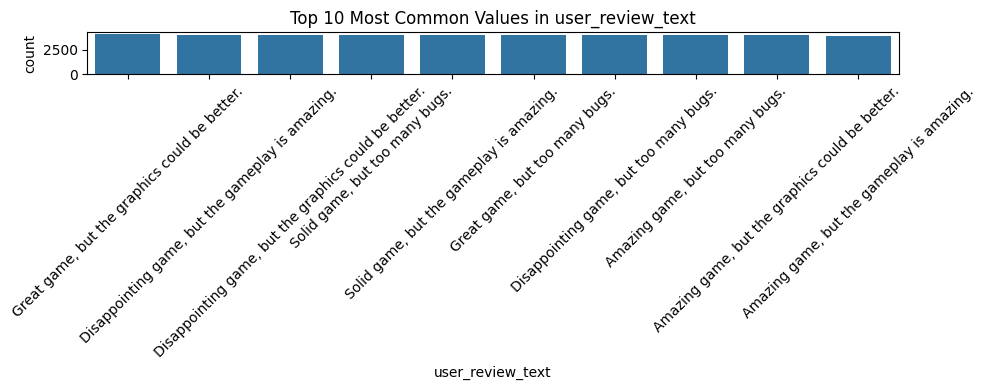

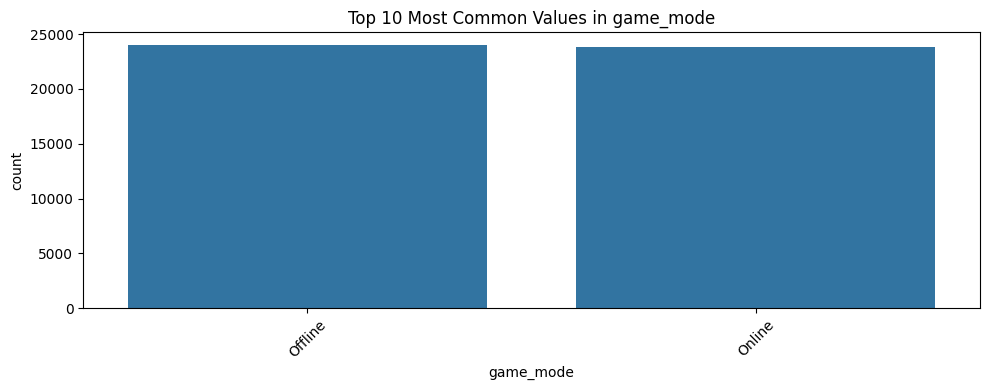

In [8]:
# Distribution
for col in df_categorical.columns:
    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index[:10]  # top 10
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Step 3: Bivariate Analysis

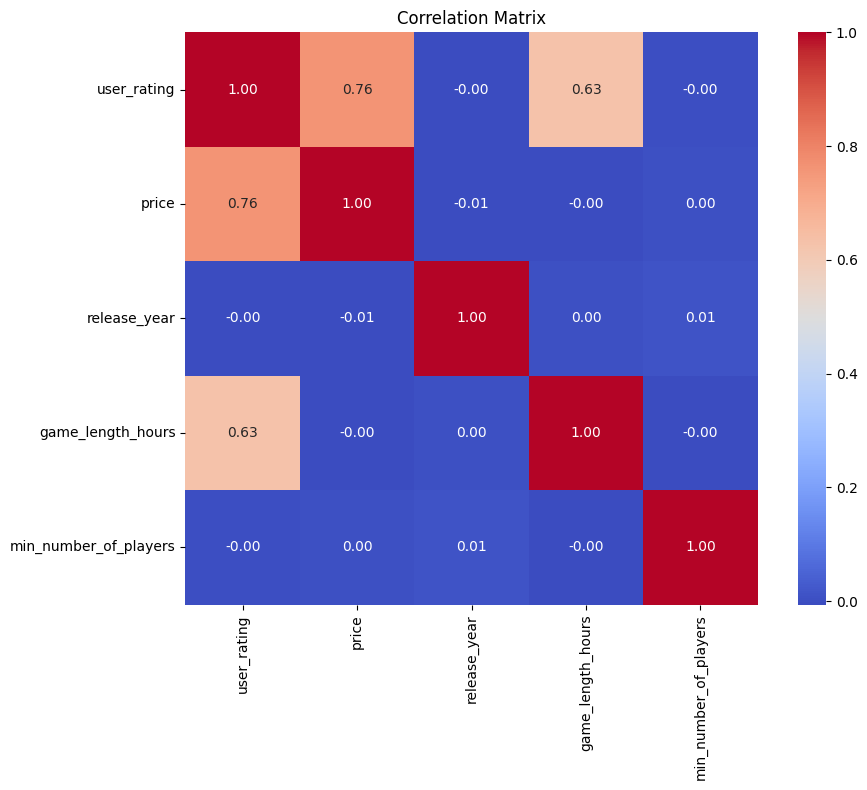

In [10]:
# Correlation Matrix of Numeric Features
plt.figure(figsize=(10, 8))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

The correlation matrix heatmap above shows the pairwise linear relationships between numeric variables. Strong positive or negative correlations are highlighted, which can indicate redundancy or potential multicollinearity.

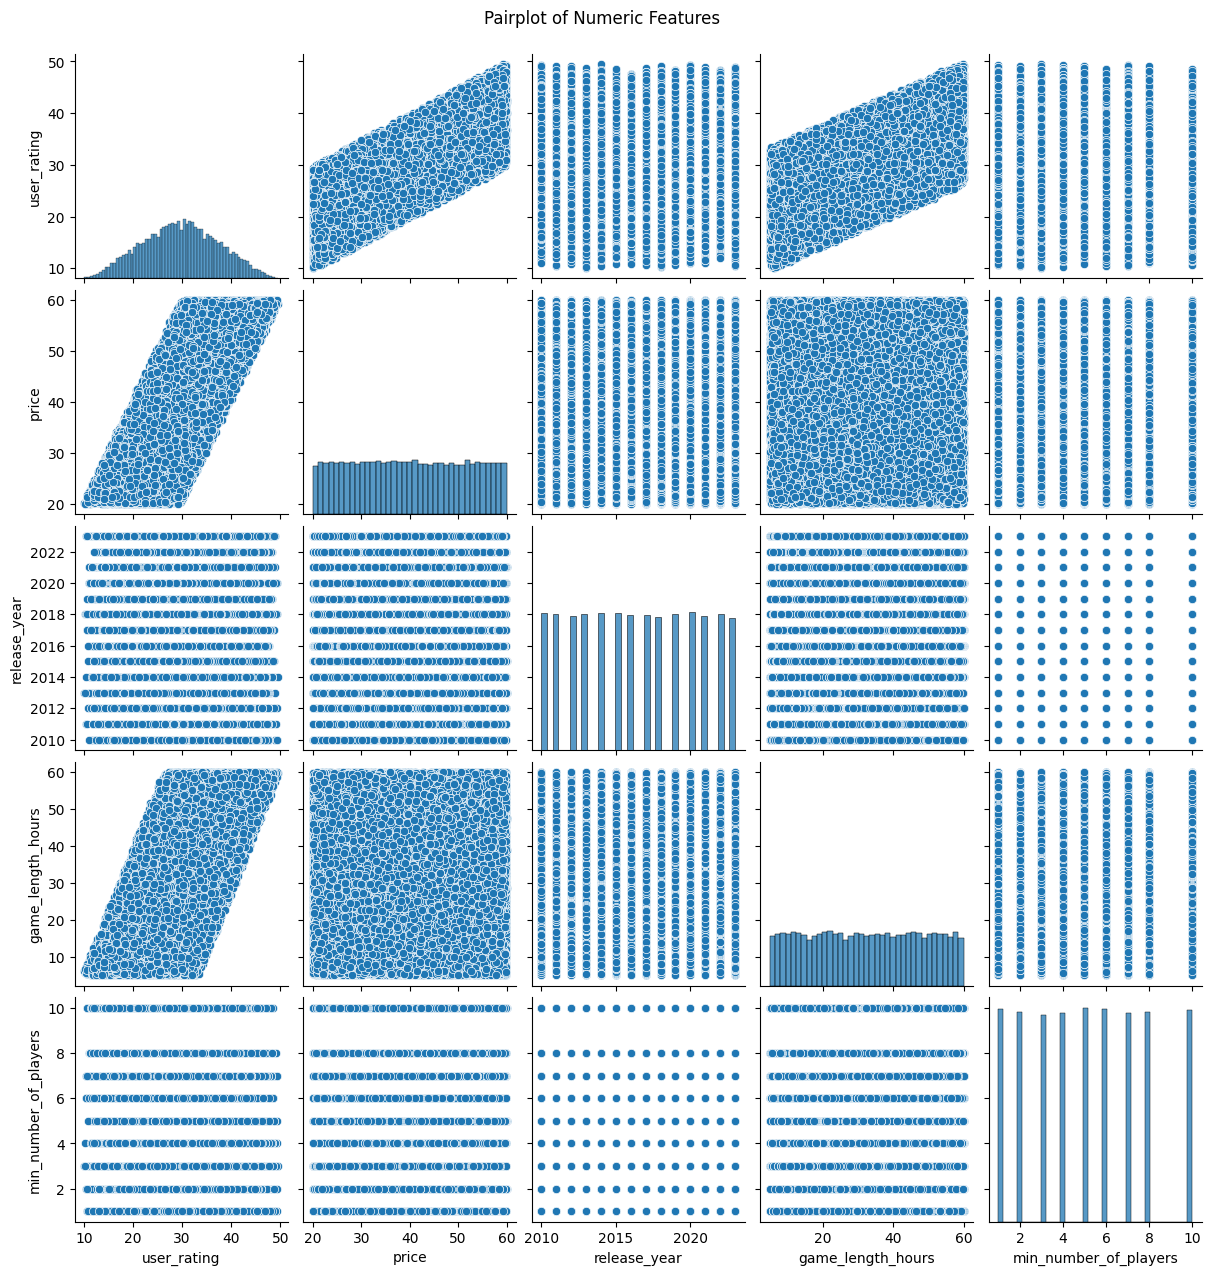

In [ ]:
# Pairplot for selected numeric features
if len(df_numeric.columns) <= 5:
    sns.pairplot(df_numeric)
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()


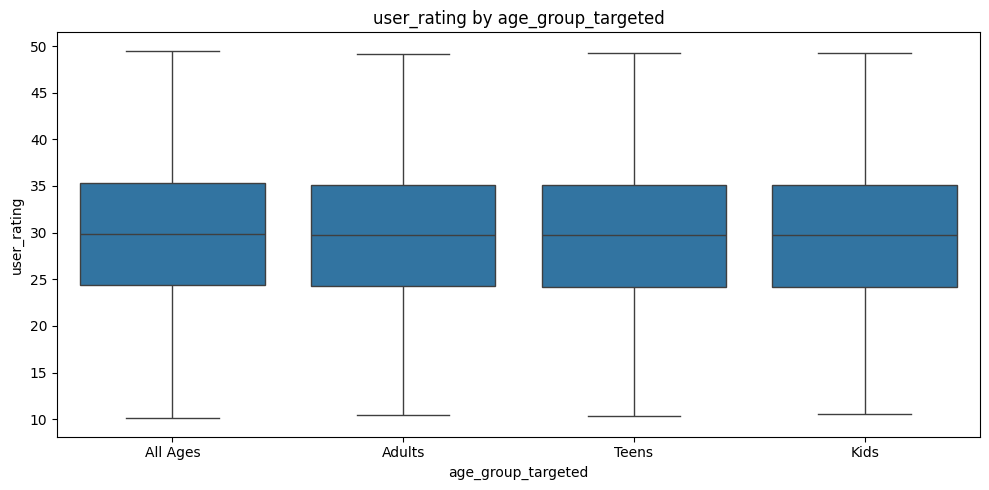

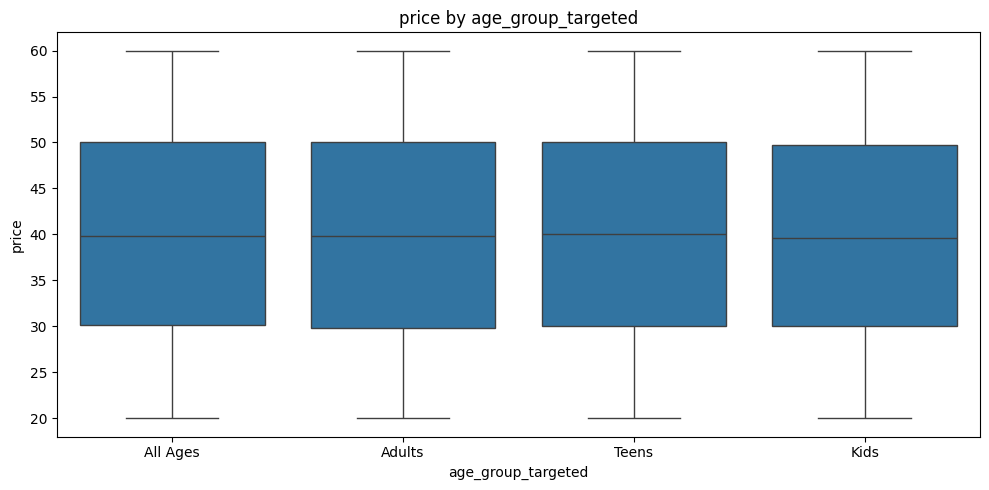

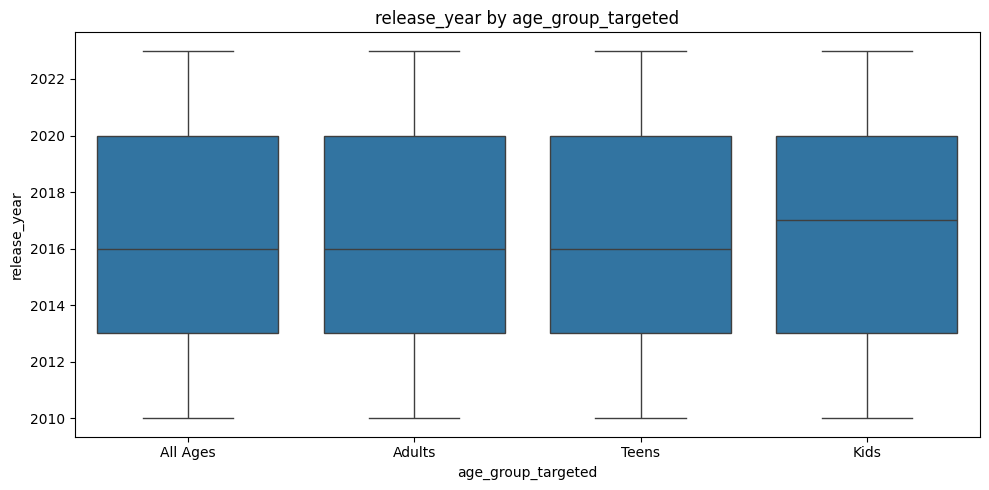

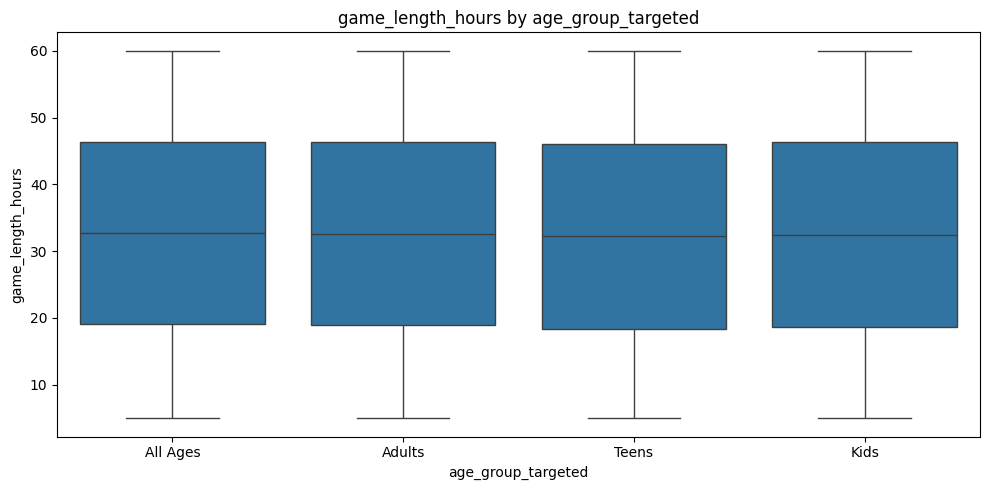

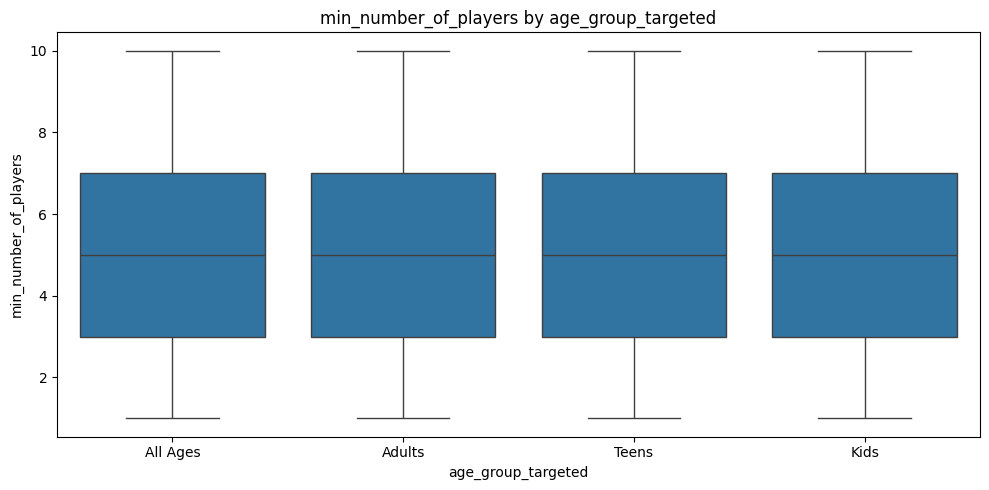

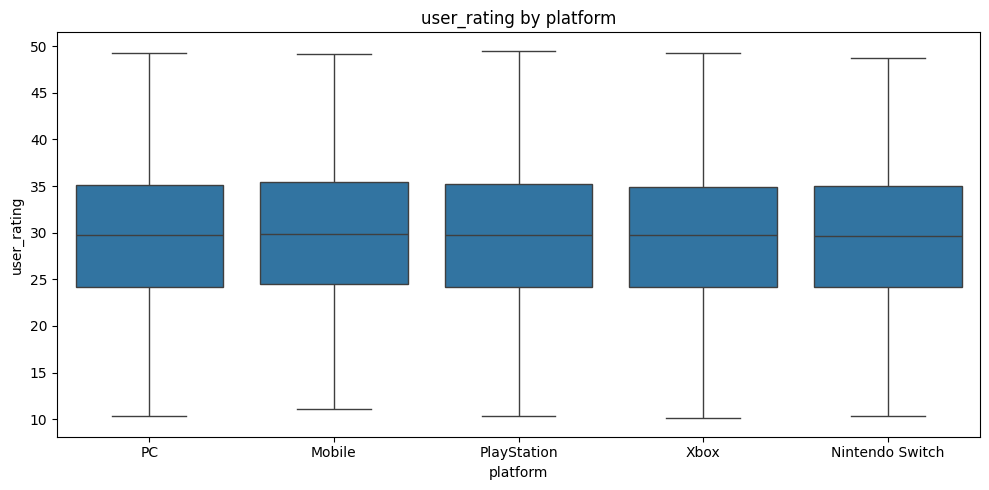

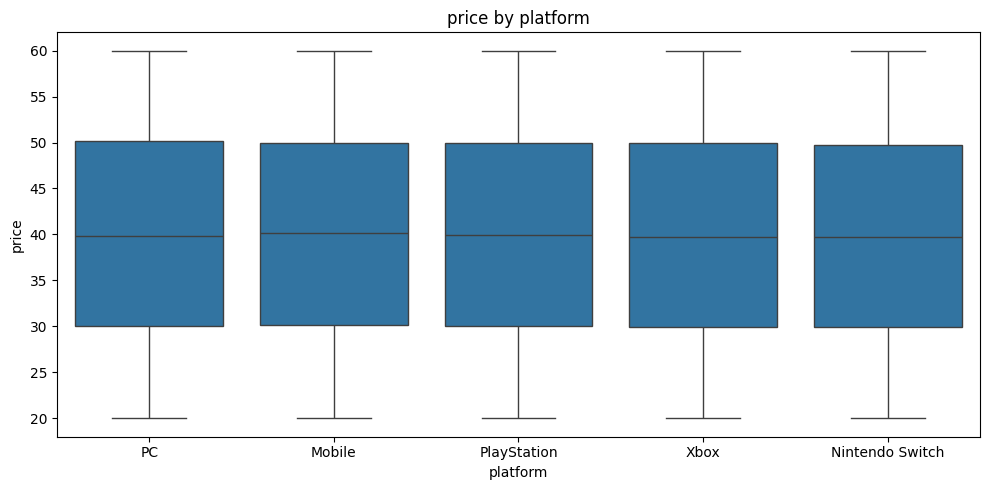

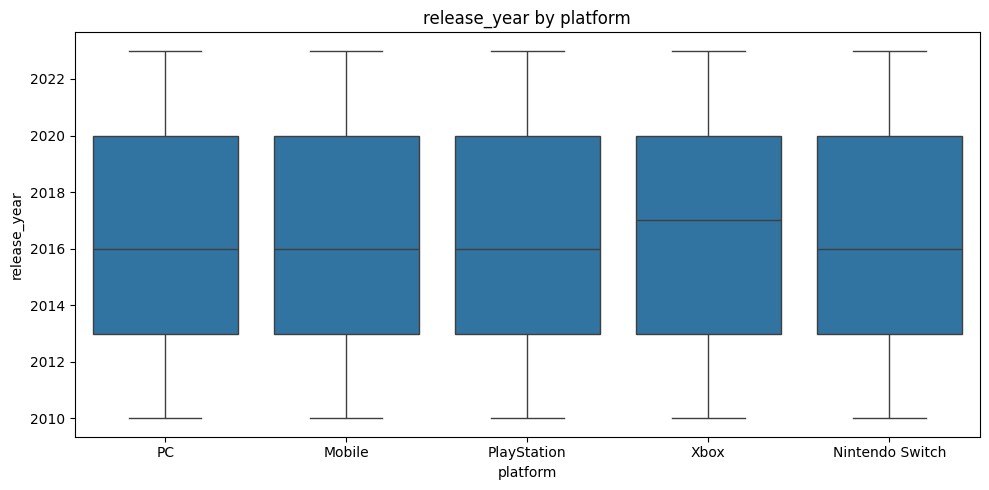

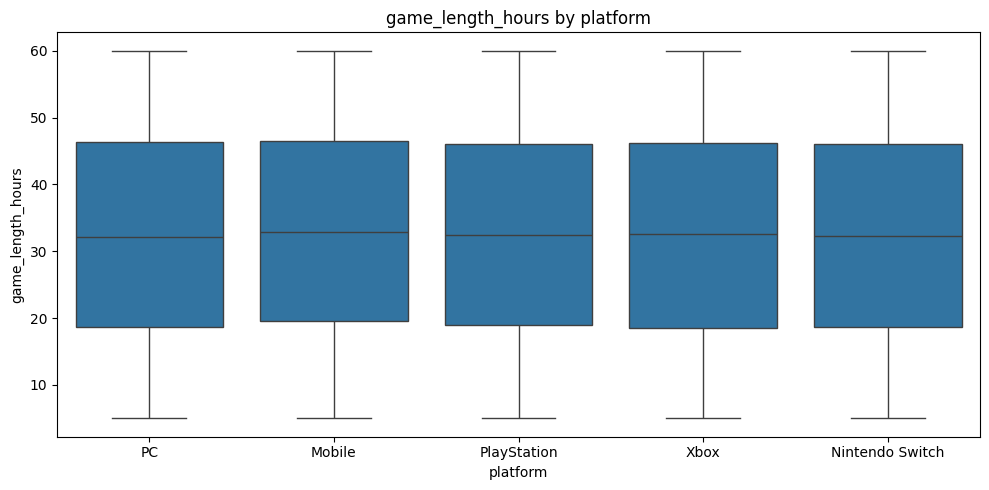

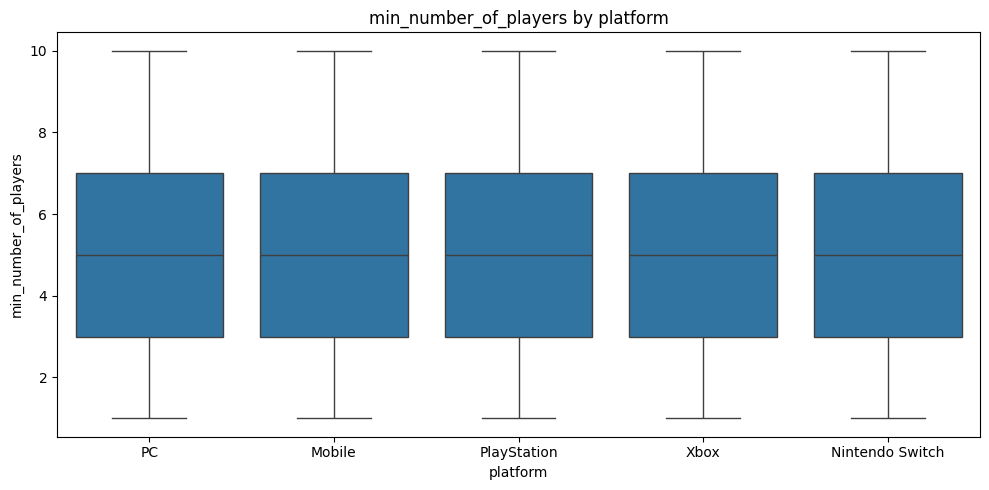

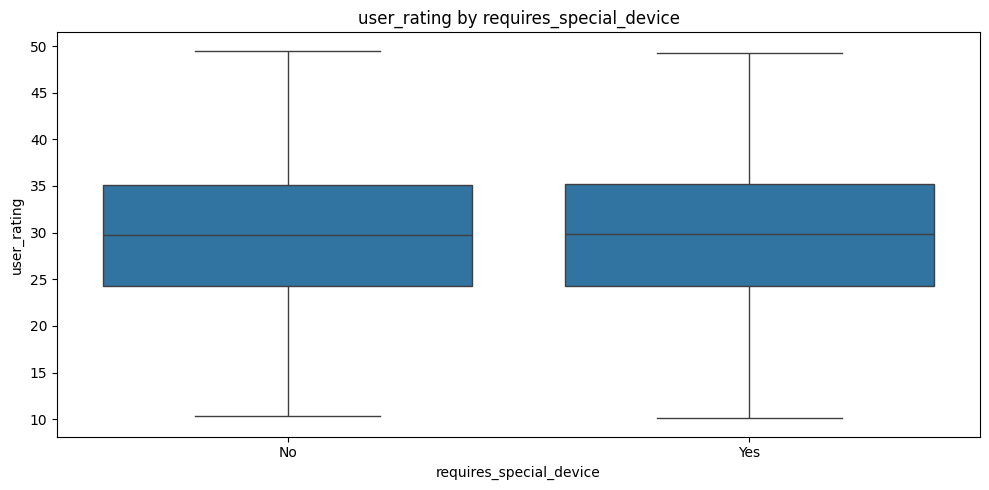

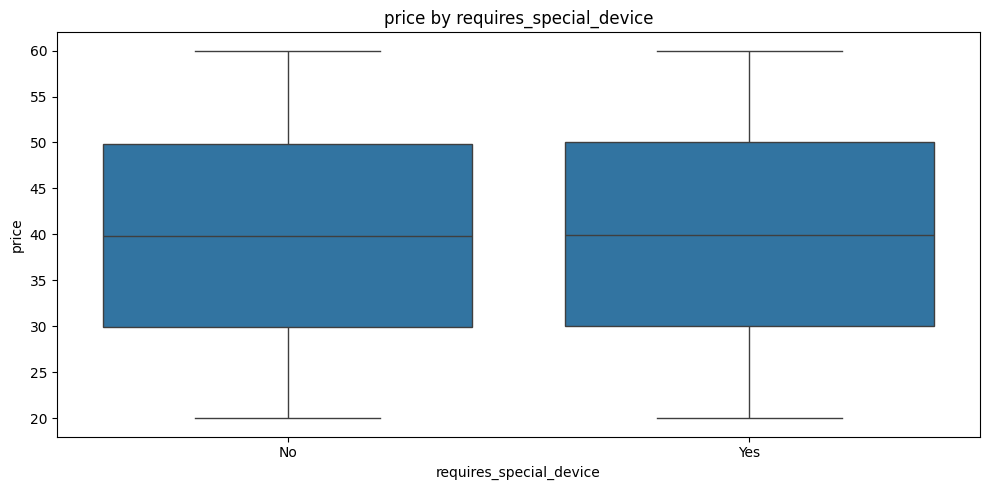

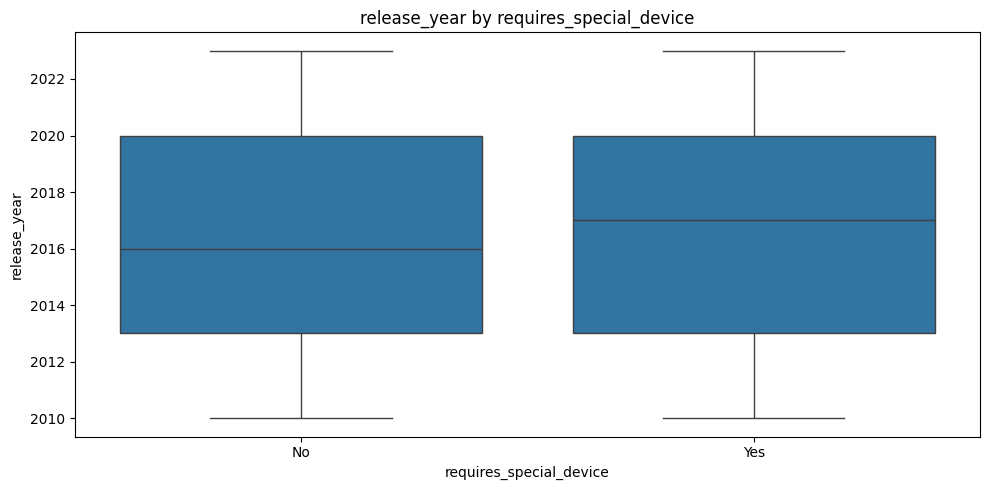

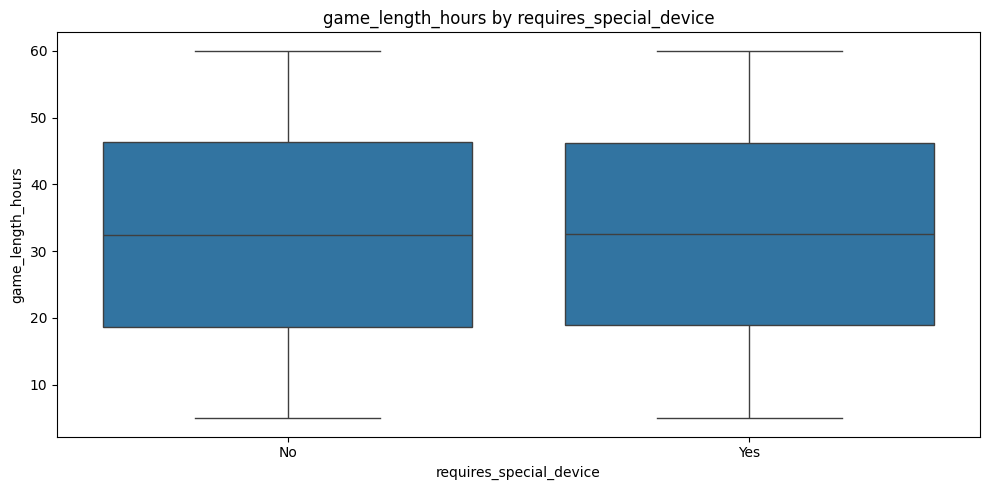

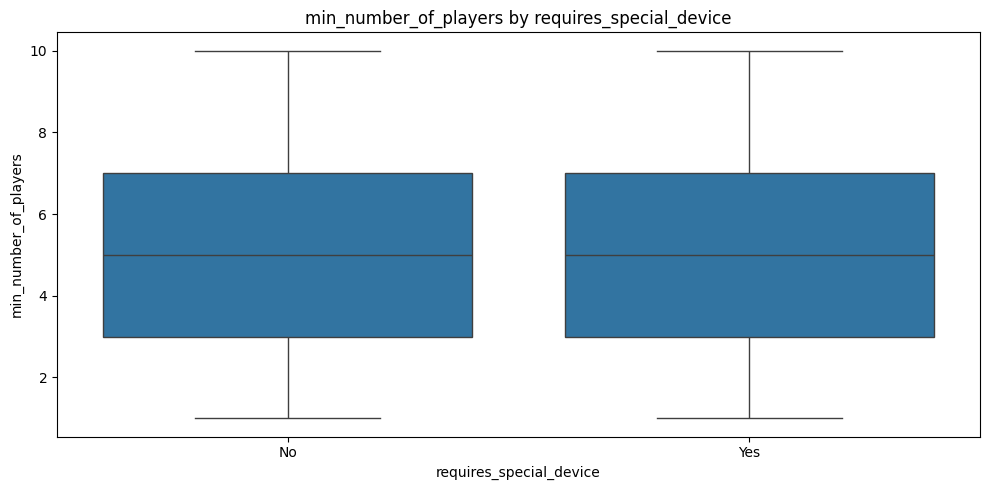

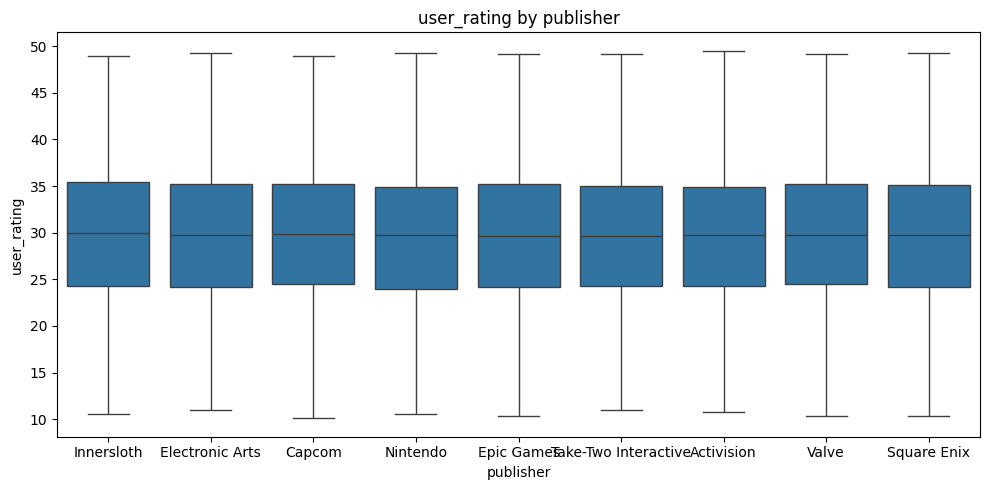

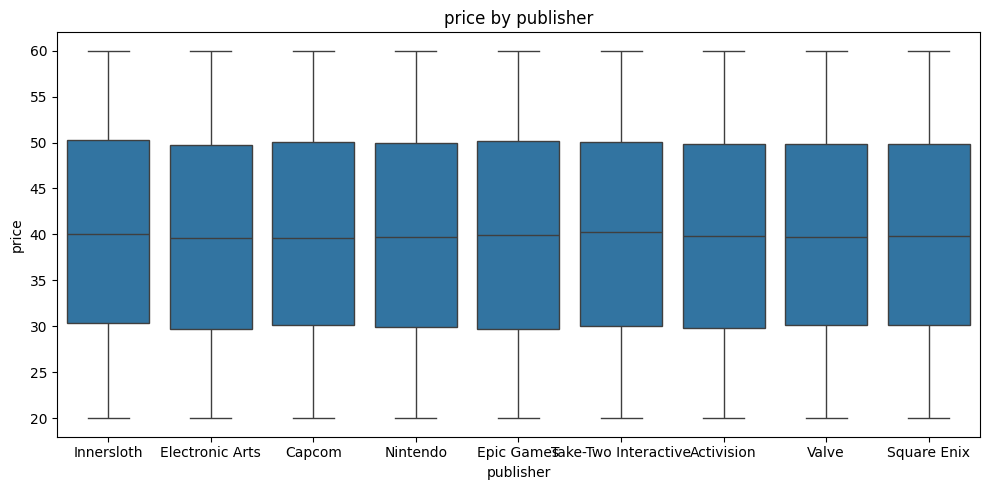

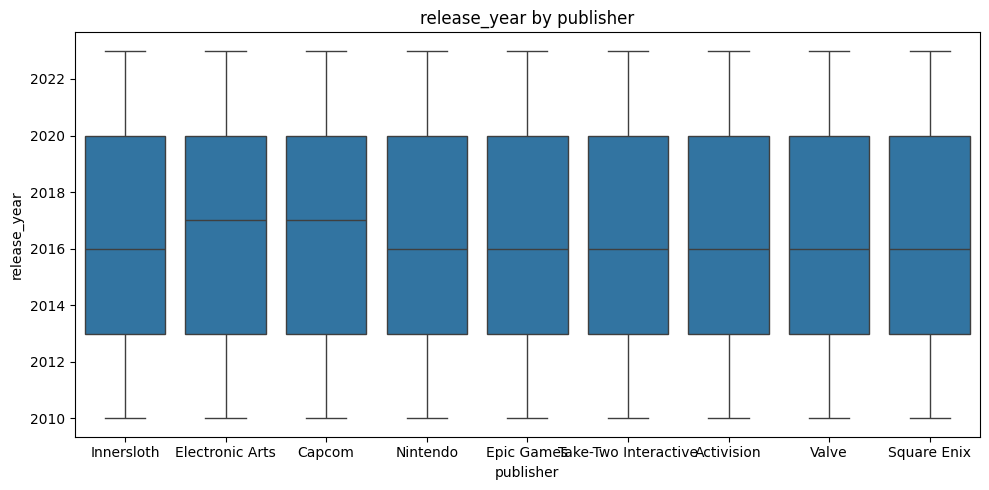

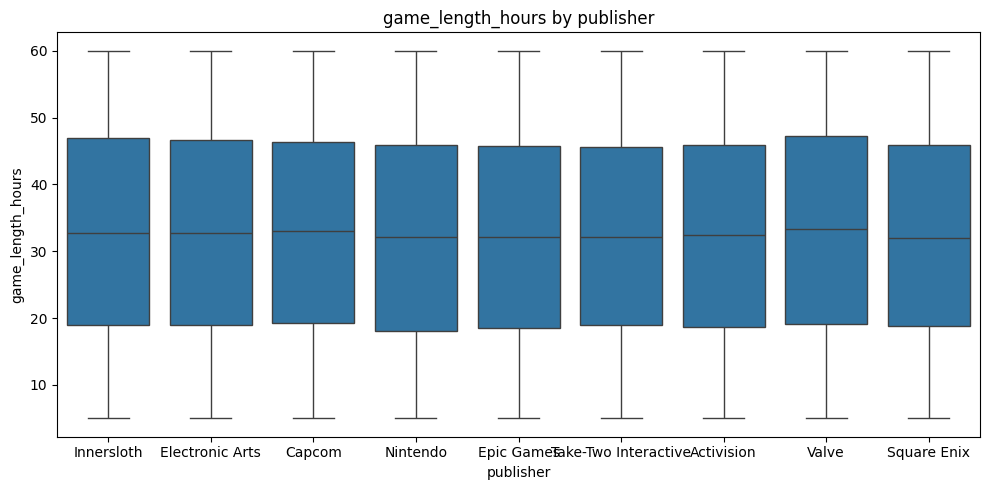

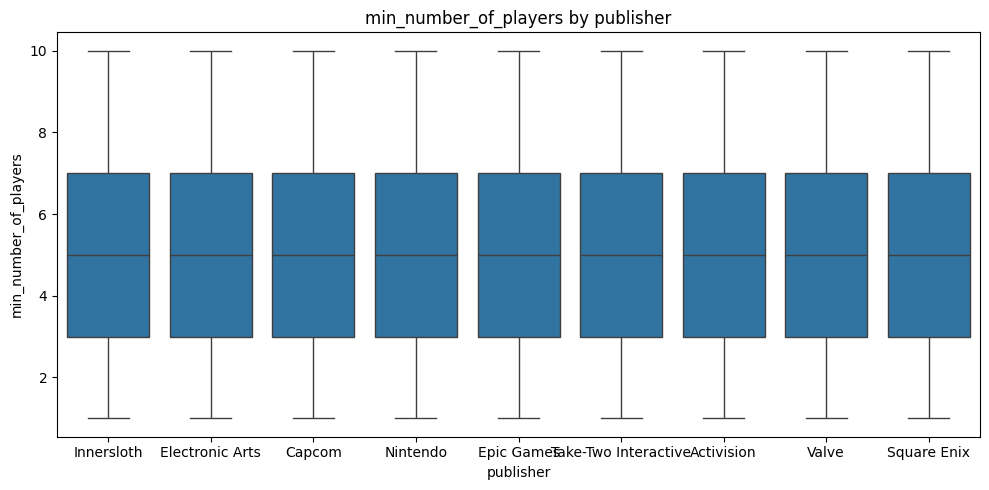

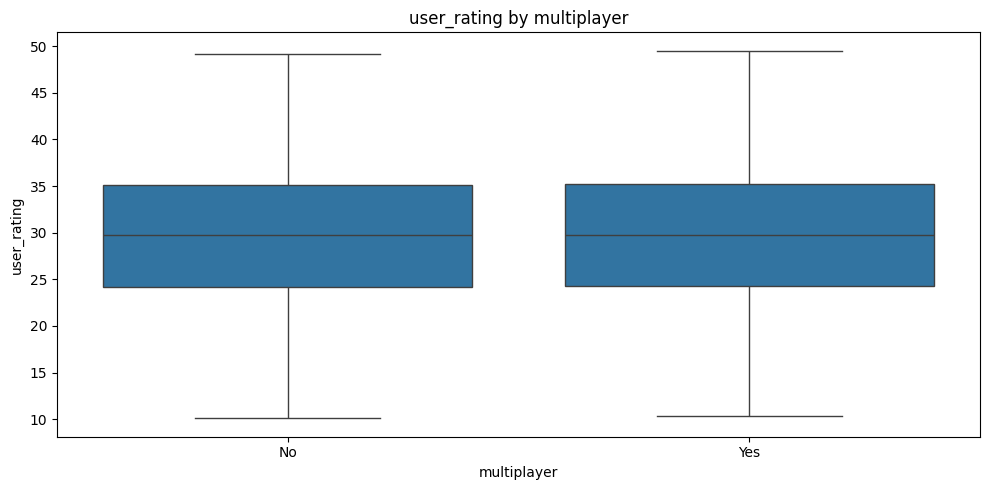

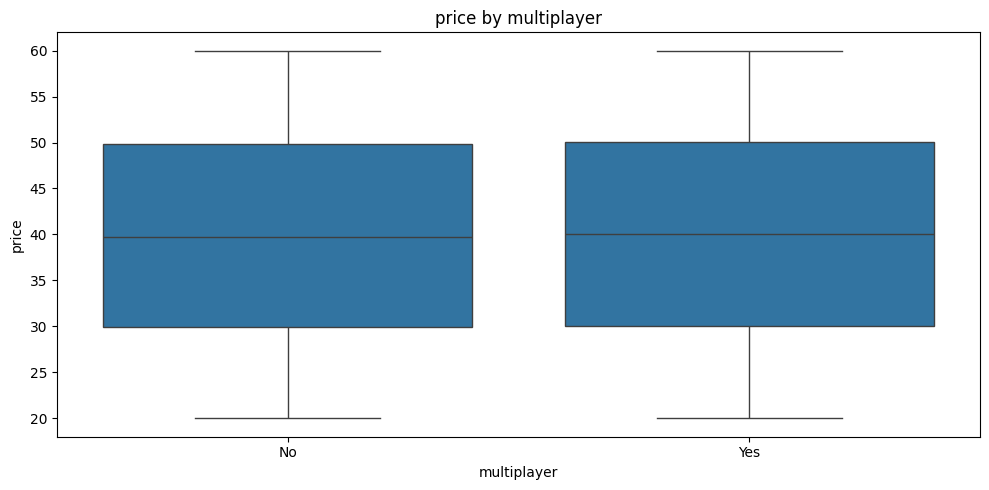

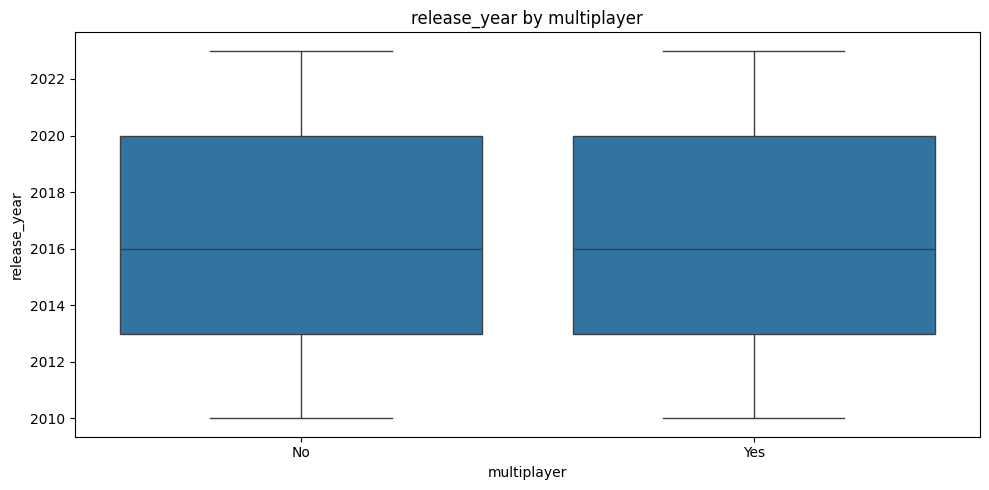

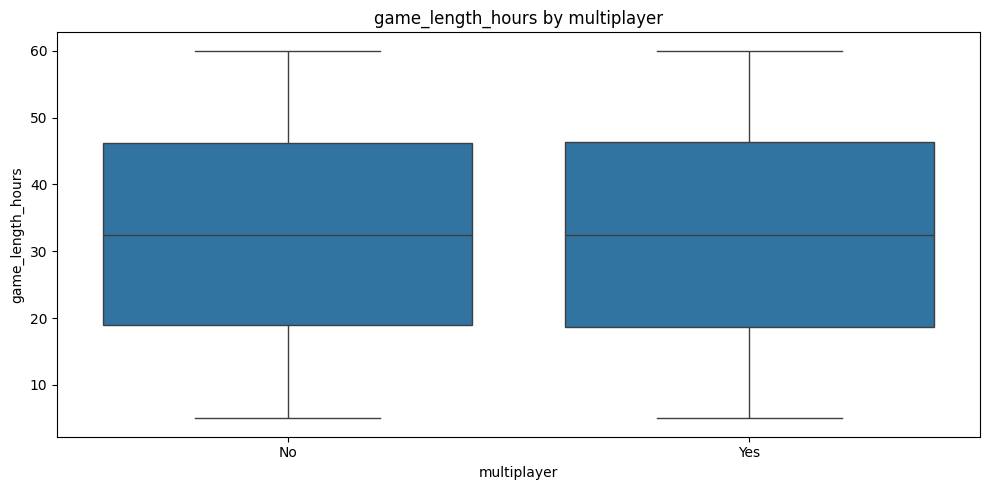

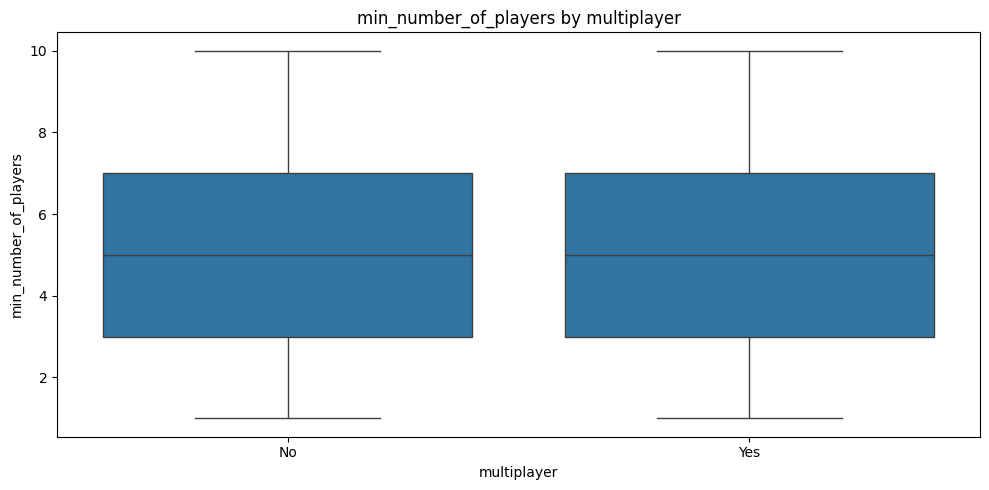

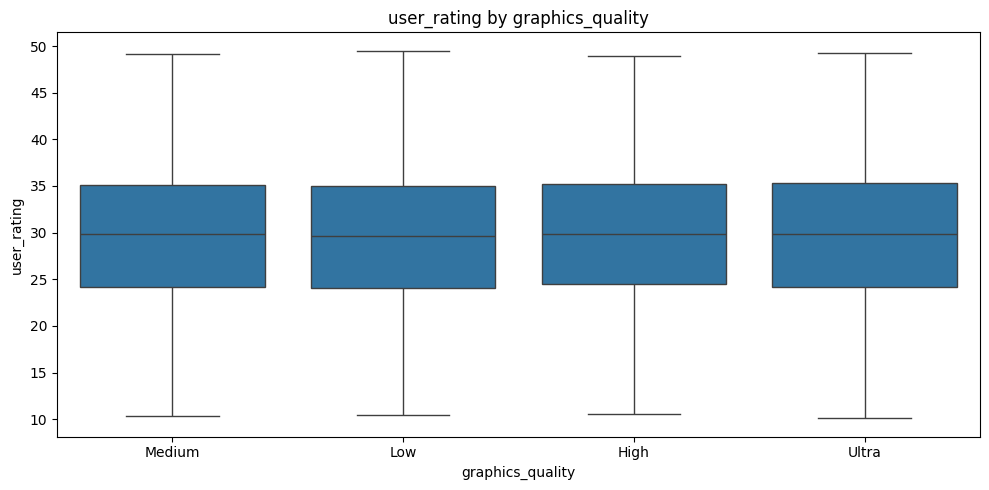

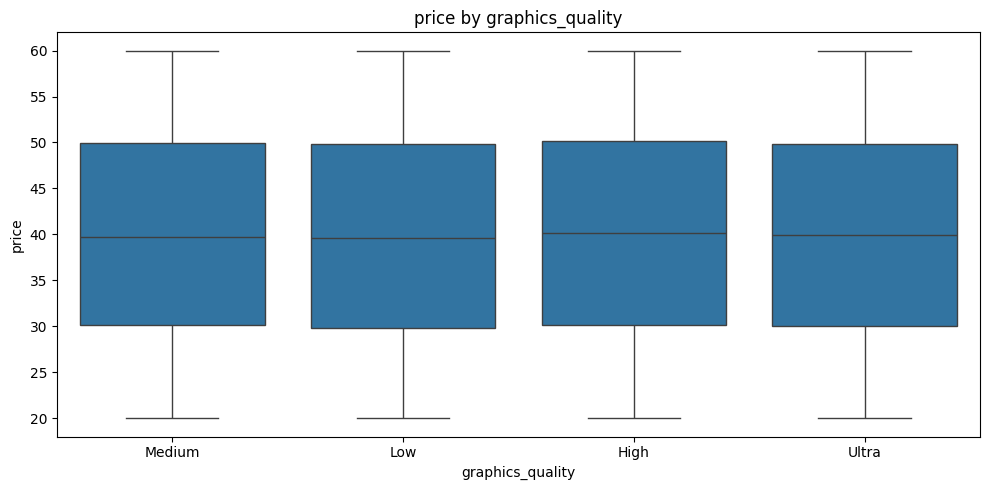

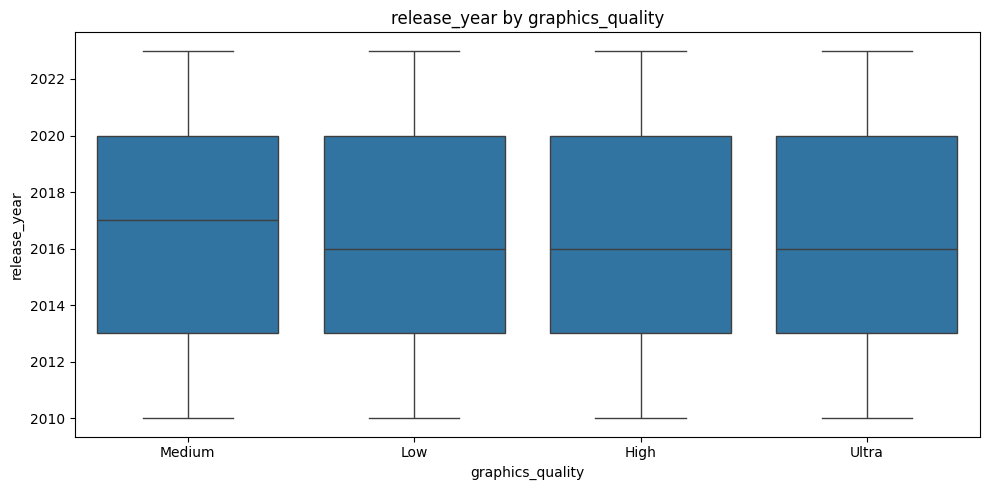

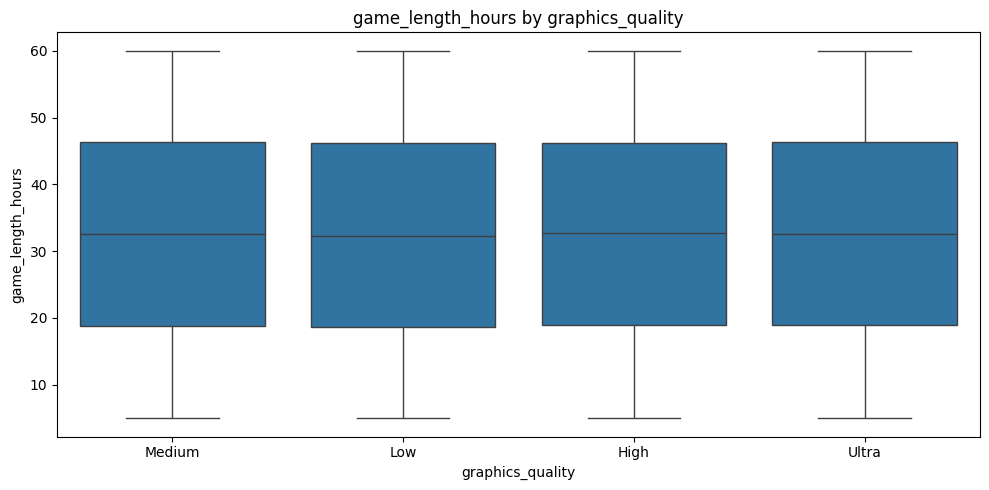

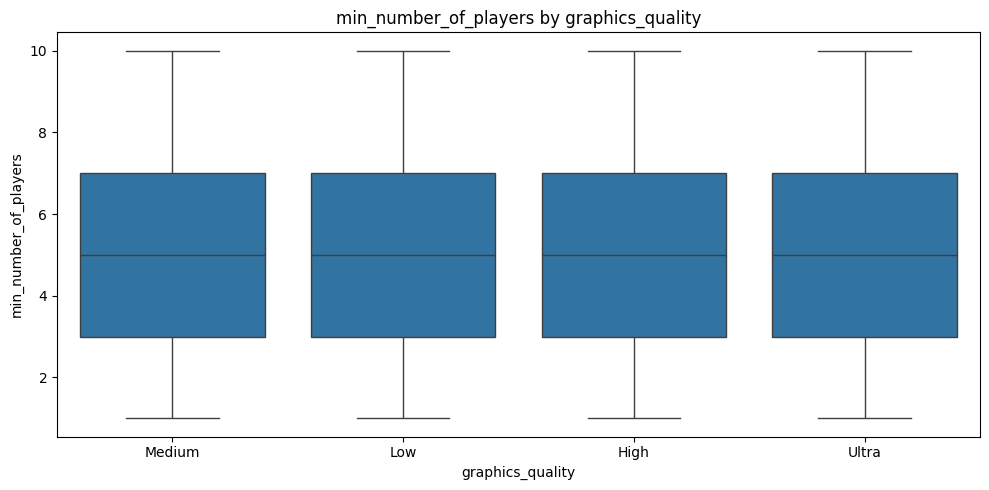

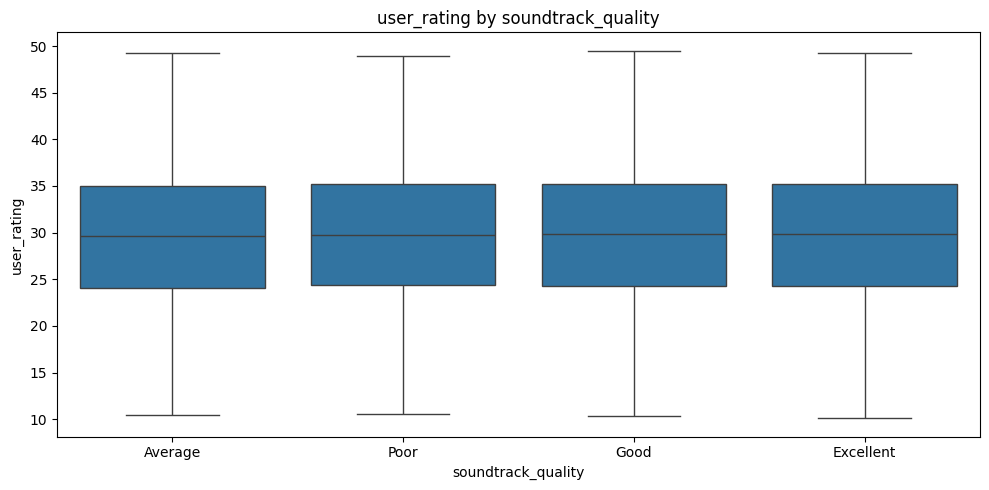

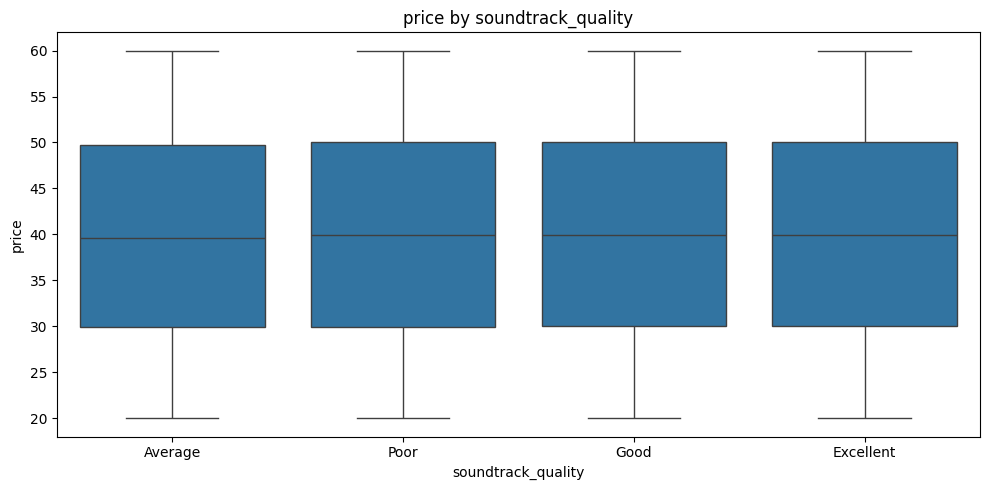

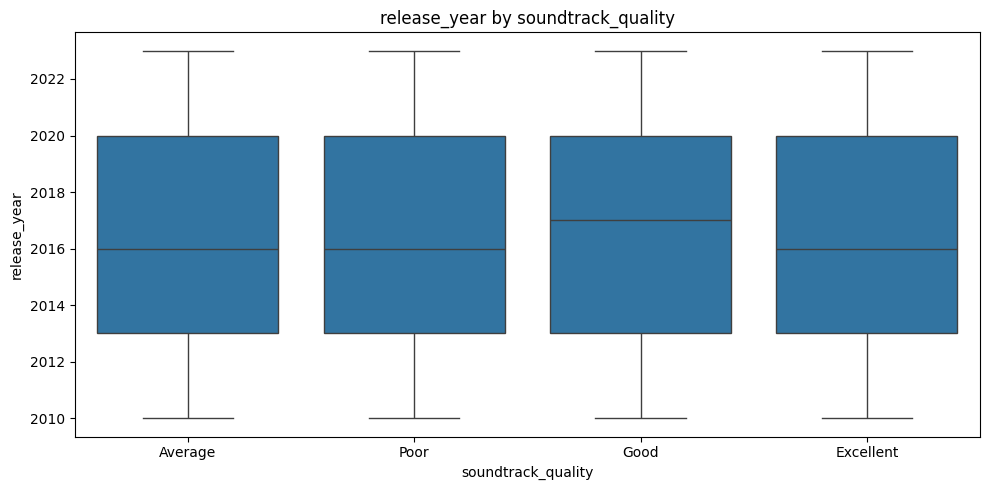

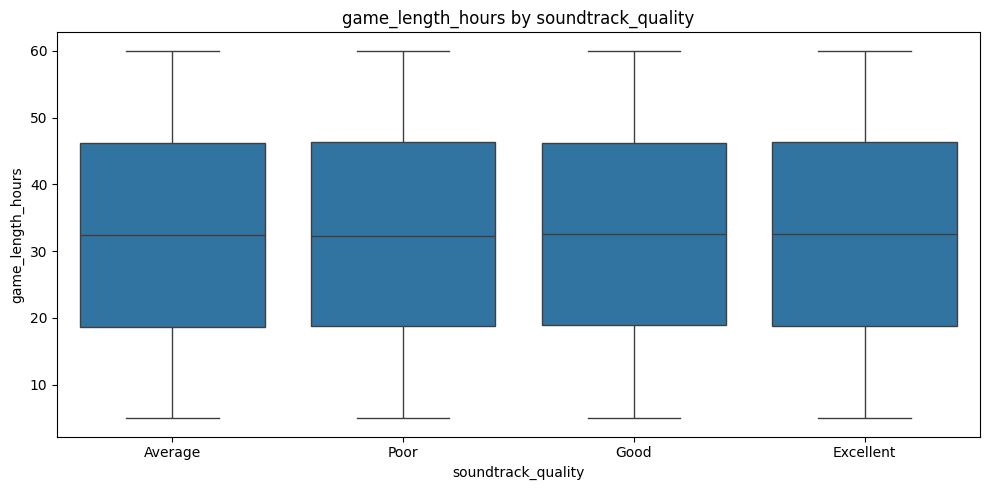

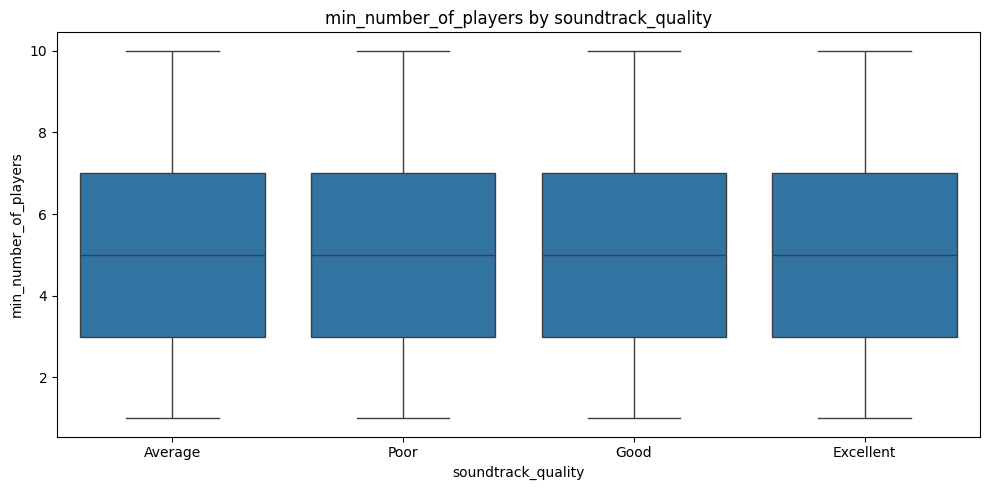

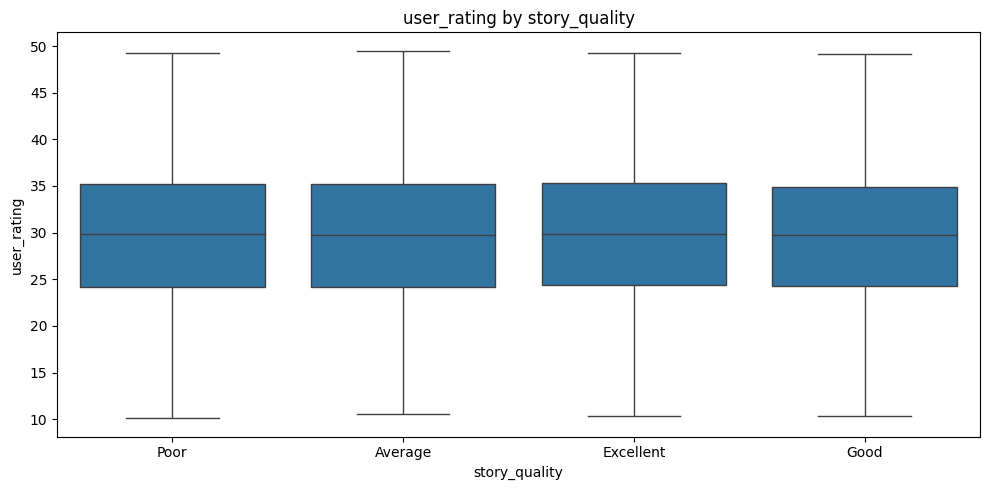

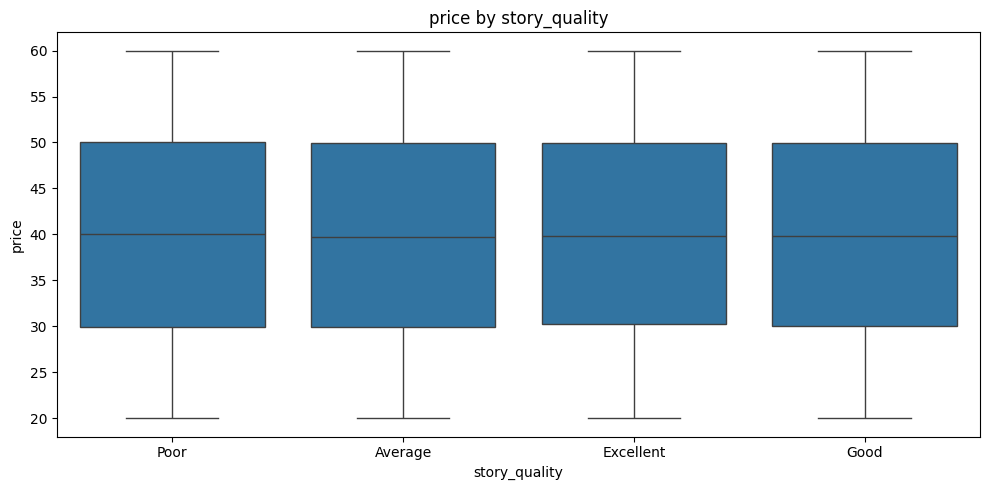

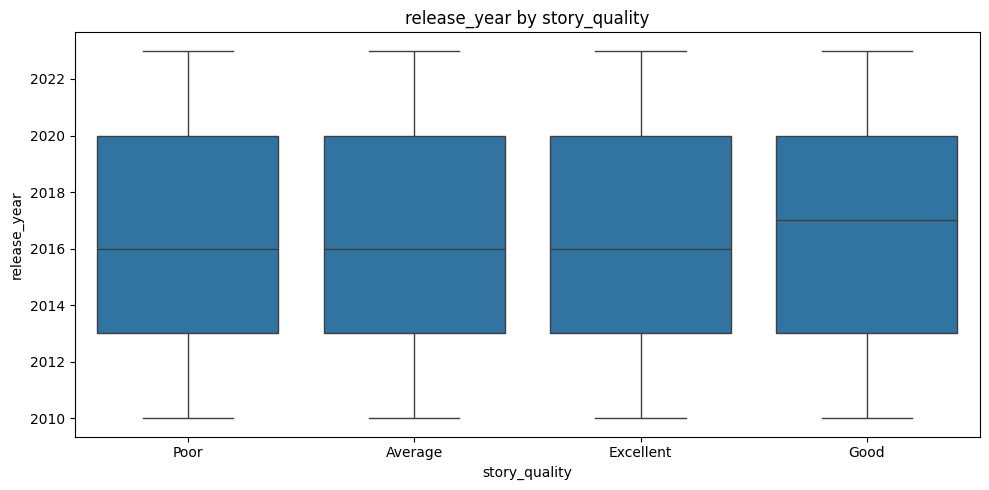

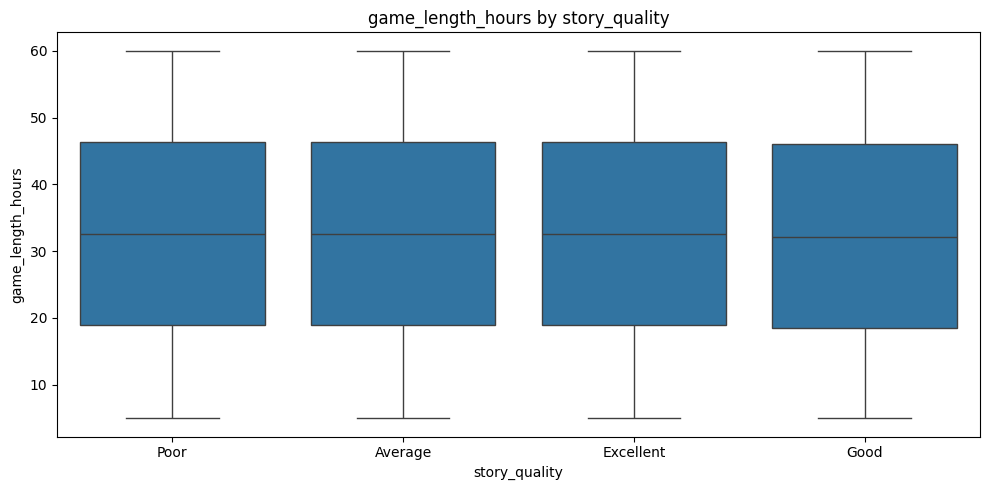

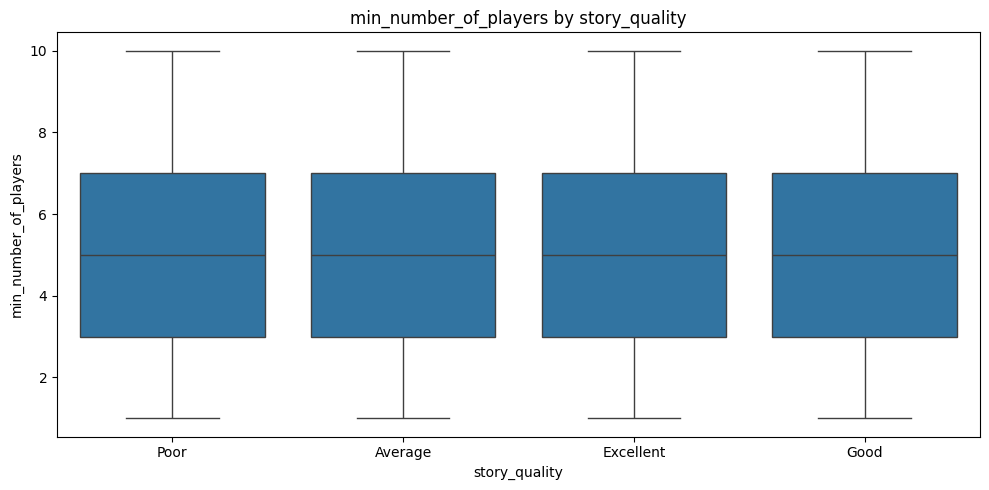

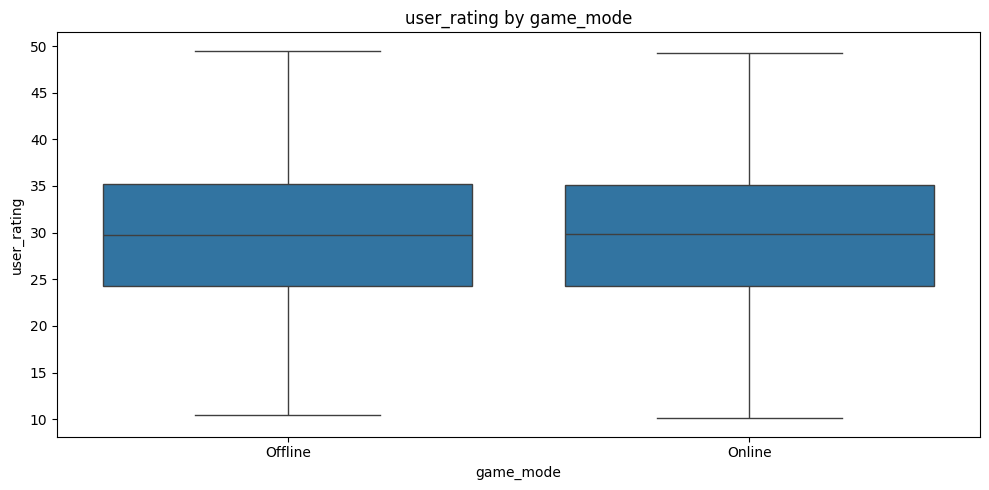

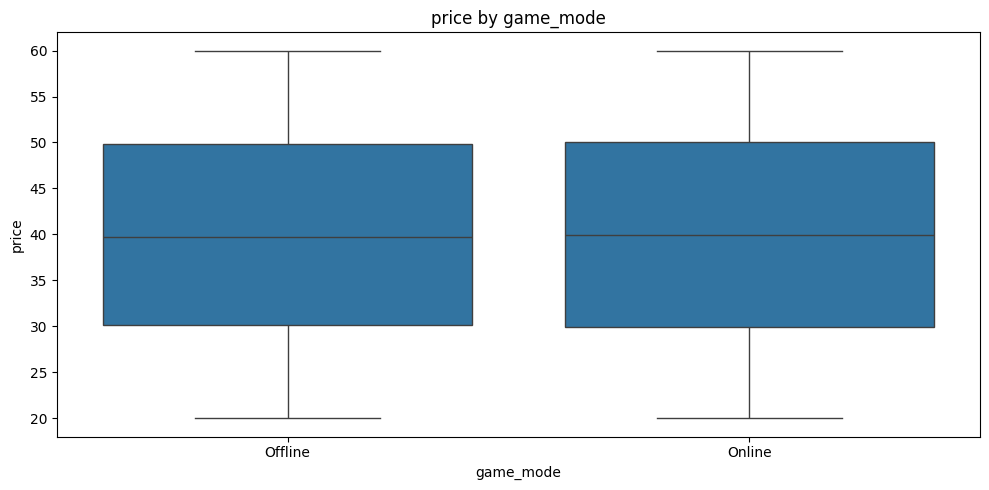

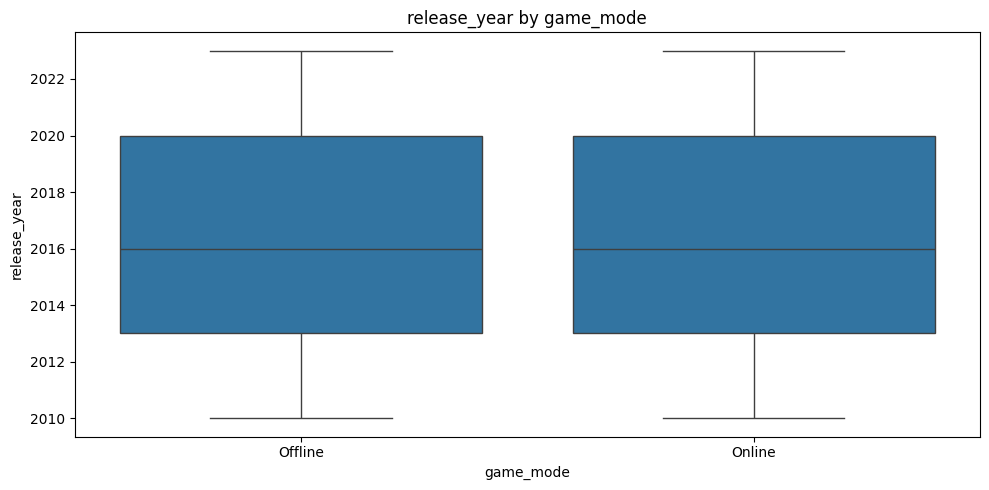

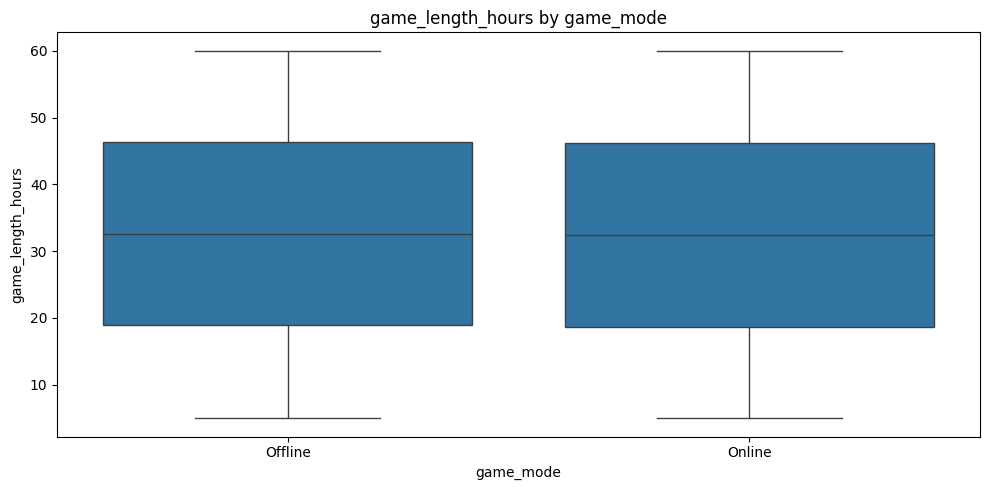

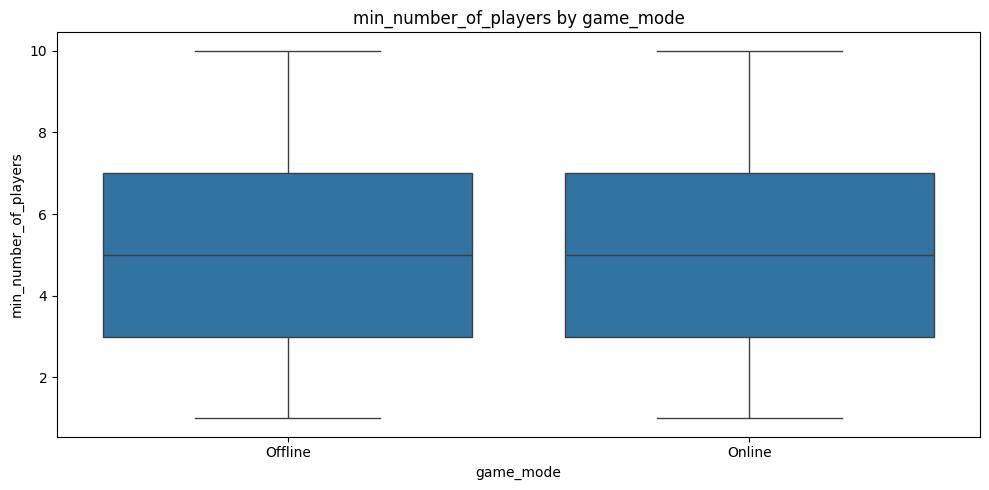

In [12]:
# Boxplots of Numeric by Top Categorical Columns
top_cat_cols = [col for col in df_categorical.columns if df[col].nunique() < 10]

for cat_col in top_cat_cols:
    for num_col in df_numeric.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f"{num_col} by {cat_col}")
        plt.tight_layout()
        plt.show()

The boxplots above compare the distribution of numeric variables across the most frequent categories of selected categorical variables. 

## Step 4 : Text Analysis

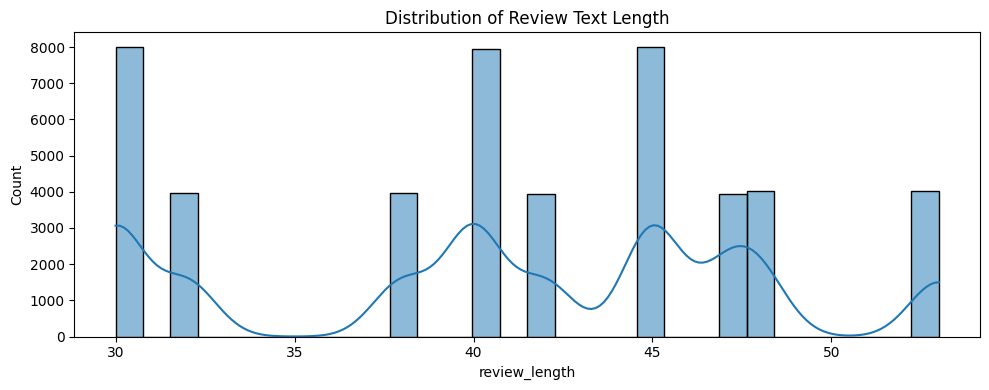

In [13]:
# Text Length
if 'user_review_text' in df.columns:
    df['review_length'] = df['user_review_text'].fillna('').apply(len)
    plt.figure(figsize=(10, 4))
    sns.histplot(df['review_length'], bins=30, kde=True)
    plt.title("Distribution of Review Text Length")
    plt.tight_layout()
    plt.show()



The distribution of notice lengths is clearly unnatural: there are sharp peaks around specific values such as 30, 40, 45 and 48 characters, with deep troughs in between. This probably indicates that the texts are generated or constrained by a formatting system or predefined response templates. The behavior is typical of content produced semi-automatically or with strict limits imposed on message length. It's a far cry from the organic distribution you'd expect from true free reviews.

## Conclusion

The data doesn’t scream anything obvious, but when you look closer, there are some cool things to notice. We looked at over 47,000 games and found a few surprises.

First, the average user rating is around 29.7 out of 50 — not amazing, but pretty steady. Games cost about $40 on average, which shows gaming isn’t a cheap hobby. But that average hides a wide range: some games are $20, others are almost $60. And price doesn’t always mean better quality.

Most of the games were released between 2010 and 2023, with the average around 2016. Playtime really depends — some games are over 60 hours, others are done in five. There’s no clear pattern.

Same thing for features like multiplayer, number of players, or quality tags like graphics or story. Nothing really stood out — it’s all over the place.

But here’s the interesting part: even if a game didn’t score high on paper, people still loved it. Reviews mentioned fun, nostalgia, or just good vibes. So the numbers and the actual player experience didn’t always match.

In the end, it shows that games aren’t just about stats. What matters is how they make you feel — and some just stick with you.
